# No-show 발생률을 줄일 수 있는 아이디어?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

## 1. 데이터 로딩

In [4]:
file_path = './Data01/'
file_list = os.listdir(file_path)
print(file_list)

['medical.csv']


In [5]:
df_rawdata_medical = pd.read_csv(file_path+file_list[0])
df_rawdata_medical.info()
df_rawdata_medical.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


## 2. 기초 통계와 Na값 확인

In [7]:
df_rawdata_medical.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,88208
mean,1.474961e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.321026,NaN
std,2.560943e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.466873,NaN
min,3.920000e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,NaN
25%,4.170000e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,NaN
50%,3.170000e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,NaN
75%,9.440000e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,1.000000,NaN


In [10]:
# 열별 행방향 중 하나라도 널값이 있는지 조사
pd.concat([df_rawdata_medical.isnull().sum(), df_rawdata_medical.isnull().any(axis=0)], axis=1)
# pd.concat([df_rawdata_medical.notnull().sum(), df_rawdata_medical.notnull().any(axis=0)], axis=1)

,0,1
PatientId,0,False
AppointmentID,0,False
Gender,0,False
ScheduledDay,0,False
AppointmentDay,0,False
Age,0,False
Neighbourhood,0,False
SMS_received,0,False
No-show,0,False


In [12]:
# 행별 열방향 중 하나라도 널값이 있는지 조사
pd.concat([df_rawdata_medical.T.isna().sum(), df_rawdata_medical.isna().any(axis=1)], axis=1)
# pd.concat([df_rawdata_medical.T.notna().sum(), df_rawdata_medical.notna().any(axis=1)], axis=1)

,0,1
0,9,True
1,9,True
2,9,True
3,9,True
4,9,True
...,...,...
110522,9,True
110523,9,True
110524,9,True
110525,9,True


## 3. 데이터 전처리
 - 파생변수(새로운 변수) 생성
 - 이상치 제거

### 3-1. 나이의 이상값 제거

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


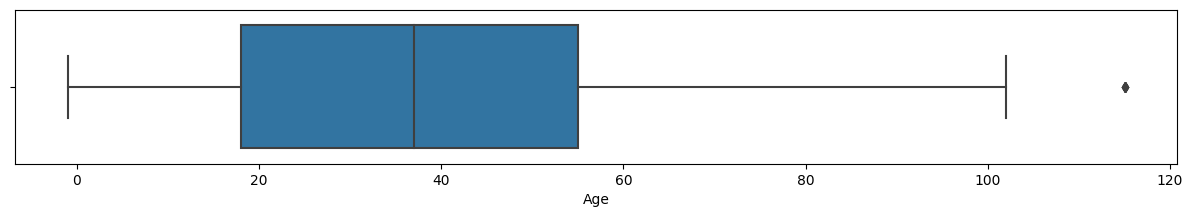

In [13]:
print(df_rawdata_medical.Age.describe())

fig, ax = plt.subplots()
fig.set_size_inches(15,2)

sns.boxplot(x = df_rawdata_medical.Age) 

plt.show()

In [14]:
# 나이의 최소 이상값 제거: 상식에 근거함
outlier_age_idx = df_rawdata_medical[df_rawdata_medical.Age < 0].index
df_rawdata_medical.Age[outlier_age_idx]

99832   -1
Name: Age, dtype: int64

In [15]:
df_mod00_medical = df_rawdata_medical.drop(outlier_age_idx, axis=0)
df_mod00_medical.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [16]:
# 나이의 최소 이상값 제거: 상식에 근거함
def detect_outlier(sr): #Series로 입력
    sr_desc = sr.describe()
    temp_Q1 = sr_desc[4]
    temp_Q1_numpy = np.percentile(sr, 25)
    temp_Q3 = sr_desc[6]
    temp_Q3_numpy = np.percentile(sr, 75)
    # IQR: Q3-Q1
    temp_IQR = temp_Q3 - temp_Q1
    # 최소값: Q1-1.5*IQR, 최대값: Q3+1.5*IQR
    temp_min = temp_Q1 - (1.5*temp_IQR)
    temp_max = temp_Q3 + (1.5*temp_IQR)
    print(f'Q1: {temp_Q1}, {temp_Q1_numpy}\nQ3: {temp_Q3}, {temp_Q3_numpy}')
    print(f'IQR(InterQuantile Range): {temp_IQR}')
    print(f'Box min: {temp_min}, Box max: {temp_max}')
    outlier_idx = sr[(sr < temp_min) | (sr > temp_max)].index
    return outlier_idx

outlier_idx = detect_outlier(df_mod00_medical.Age)
print(outlier_idx)
df_mod00_medical.Age[outlier_idx]

Q1: 18.0, 18.0
Q3: 55.0, 55.0
IQR(InterQuantile Range): 37.0
Box min: -37.5, Box max: 110.5
Int64Index([63912, 63915, 68127, 76284, 97666], dtype='int64')


63912    115
63915    115
68127    115
76284    115
97666    115
Name: Age, dtype: int64

In [17]:
df_mod01_medical = df_mod00_medical.drop(outlier_idx, axis=0)
df_mod01_medical.Age.describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

In [18]:
pd.concat([df_rawdata_medical.Age.describe(), df_mod00_medical.Age.describe(), df_mod01_medical.Age.describe()], axis=1)

,Age,Age,Age
count,110527.000000,110526.000000,110521.000000
mean,37.088874,37.089219,37.085694
std,23.110205,23.110026,23.104606
min,-1.000000,0.000000,0.000000
25%,18.000000,18.000000,18.000000
50%,37.000000,37.000000,37.000000
75%,55.000000,55.000000,55.000000
max,115.000000,115.000000,102.000000


### 3-2. No-Show 값을 Binary 숫자로 변경

In [19]:
df_mod01_medical['No-show'].value_counts()

No     88205
Yes    22316
Name: No-show, dtype: int64

In [34]:
df_mod02_medical = df_mod01_medical.copy()

In [35]:
# Series의 Map을 활용
# df_mod02_medical['No-show'] = df_mod02_medical['No-show'].map({'Yes':1,'No':0})

# Series의 str.replace를 활용
# df_mod02_medical['No-show'] = df_mod02_medical['No-show'].str.replace('Yes', '1', regex=False)
# df_mod02_medical['No-show'] = df_mod02_medical['No-show'].str.replace('No', '0', regex=False)

# # boolean indexing를 활용
#### df_mod02_medical['No-show'][df_mod02_medical['No-show'] == 'Yes'] = 1 
df_mod02_medical.iloc[df_mod02_medical['No-show'] == 'Yes', 8] = 1
df_mod02_medical.iloc[df_mod02_medical['No-show'] == 'No', 8] = 0

In [37]:
df_mod02_medical['No-show'].value_counts()

0    88205
1    22316
Name: No-show, dtype: int64

### 3-3. 병원예약일과 실제방문일을 활용한 파생변수 생성
 - 예약일(Scheduled)과 실제방문(Appointment)일별 노쇼 현황 분석
 - 예약일과 실제방문일 차이가 클수록 No-show가 증가? 

In [75]:
df_mod03_medical = df_mod02_medical.copy()

In [77]:
df_mod03_medical.info()
df_mod03_medical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   SMS_received    110521 non-null  int64  
 8   No-show         110521 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 12.5+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0
...,...,...,...,...,...,...,...,...,...
110522,2.570000e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,1,0
110523,3.600000e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,1,0
110524,1.560000e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,1,0
110525,9.210000e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,1,0


In [78]:
df_mod03_medical['AppointmentDay']=pd.to_datetime(df_mod03_medical['AppointmentDay'])
df_mod03_medical['ScheduledDay']=pd.to_datetime(df_mod03_medical['ScheduledDay'])

In [79]:
df_mod03_medical.info()
df_mod03_medical.ScheduledDay[0], df_mod03_medical.AppointmentDay[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110521 non-null  float64            
 1   AppointmentID   110521 non-null  int64              
 2   Gender          110521 non-null  object             
 3   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 5   Age             110521 non-null  int64              
 6   Neighbourhood   110521 non-null  object             
 7   SMS_received    110521 non-null  int64              
 8   No-show         110521 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(3), object(3)
memory usage: 12.5+ MB


(Timestamp('2016-04-29 18:38:08+0000', tz='UTC'),
 Timestamp('2016-04-29 00:00:00+0000', tz='UTC'))

In [80]:
# 데이터 타입 변환 후 데이터 확인 시 Appointment가 항상 Scheduled보다 뒤에 있어야 함 날짜기준?
pd.concat([df_mod03_medical.ScheduledDay, df_mod03_medical.AppointmentDay], axis=1)

,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00
...,...,...
110522,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00
110523,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00
110524,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00
110525,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00


In [81]:
# dt.dayofyear를 이용하여 해당 날짜의 일년 중 일자를 도출
pd.concat([df_mod03_medical.ScheduledDay, df_mod03_medical.ScheduledDay.dt.dayofyear, df_mod03_medical.AppointmentDay, df_mod03_medical.AppointmentDay.dt.dayofyear], axis=1)

,ScheduledDay,ScheduledDay,AppointmentDay,AppointmentDay
0,2016-04-29 18:38:08+00:00,120,2016-04-29 00:00:00+00:00,120
1,2016-04-29 16:08:27+00:00,120,2016-04-29 00:00:00+00:00,120
2,2016-04-29 16:19:04+00:00,120,2016-04-29 00:00:00+00:00,120
3,2016-04-29 17:29:31+00:00,120,2016-04-29 00:00:00+00:00,120
4,2016-04-29 16:07:23+00:00,120,2016-04-29 00:00:00+00:00,120
...,...,...,...,...
110522,2016-05-03 09:15:35+00:00,124,2016-06-07 00:00:00+00:00,159
110523,2016-05-03 07:27:33+00:00,124,2016-06-07 00:00:00+00:00,159
110524,2016-04-27 16:03:52+00:00,118,2016-06-07 00:00:00+00:00,159
110525,2016-04-27 15:09:23+00:00,118,2016-06-07 00:00:00+00:00,159


In [82]:
import datetime as dt
# 차이를 통해서 대시 기간(일자)를 도출 이때 대기일자는 무조건 양수여야 함
# df_mod03_medical['waiting_day'] = df_mod03_medical.AppointmentDay.dt.dayofyear - df_mod03_medical.ScheduledDay.dt.dayofyear
df_mod03_medical['waiting_day'] = df_mod03_medical.AppointmentDay.dt.date - df_mod03_medical.ScheduledDay.dt.date
df_mod03_medical.info()
# df_mod03_medical[df_mod03_medical['waiting_day'] < 0]
df_mod03_medical[df_mod03_medical['waiting_day'] <= dt.timedelta(days=-1)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110521 non-null  float64            
 1   AppointmentID   110521 non-null  int64              
 2   Gender          110521 non-null  object             
 3   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 5   Age             110521 non-null  int64              
 6   Neighbourhood   110521 non-null  object             
 7   SMS_received    110521 non-null  int64              
 8   No-show         110521 non-null  object             
 9   waiting_day     110521 non-null  timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 13.3+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show,waiting_day
27033,7.840000e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,1,-1 days
55226,7.900000e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,1,-1 days
64175,2.430000e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,1,-1 days
71533,9.980000e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,1,-6 days
72362,3.790000e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,1,-1 days


In [83]:
df_mod03_medical.describe()

,PatientId,AppointmentID,Age,SMS_received,waiting_day
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521
mean,1.474919e+14,5.675304e+06,37.085694,0.321034,10 days 04:24:33.472009844
std,2.560922e+14,7.129576e+04,23.104606,0.466876,15 days 06:07:19.071616181
min,3.920000e+04,5.030230e+06,0.000000,0.000000,-6 days +00:00:00
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0 days 00:00:00
50%,3.170000e+13,5.680569e+06,37.000000,0.000000,4 days 00:00:00
75%,9.440000e+13,5.725523e+06,55.000000,1.000000,15 days 00:00:00
max,1.000000e+15,5.790484e+06,102.000000,1.000000,179 days 00:00:00


In [84]:
# 음수존재 확인 양수조건만 전처리로 도출
df_mod04_medical = df_mod03_medical[df_mod03_medical['waiting_day'] > dt.timedelta(days=-1)].reset_index(drop=True)

In [95]:
# 데이터 전처리 완료
df_mod04_medical.describe()

,PatientId,AppointmentID,Age,SMS_received,waiting_day
count,1.105160e+05,1.105160e+05,110516.000000,110516.000000,110516
mean,1.474892e+14,5.675304e+06,37.085861,0.321049,10 days 04:25:21.097397661
std,2.560839e+14,7.129723e+04,23.104465,0.466882,15 days 06:07:29.355505743
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0 days 00:00:00
25%,4.170000e+12,5.640284e+06,18.000000,0.000000,0 days 00:00:00
50%,3.170000e+13,5.680570e+06,37.000000,0.000000,4 days 00:00:00
75%,9.440000e+13,5.725524e+06,55.000000,1.000000,15 days 00:00:00
max,1.000000e+15,5.790484e+06,102.000000,1.000000,179 days 00:00:00


In [86]:
df_mod04_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110516 entries, 0 to 110515
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110516 non-null  float64            
 1   AppointmentID   110516 non-null  int64              
 2   Gender          110516 non-null  object             
 3   ScheduledDay    110516 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110516 non-null  datetime64[ns, UTC]
 5   Age             110516 non-null  int64              
 6   Neighbourhood   110516 non-null  object             
 7   SMS_received    110516 non-null  int64              
 8   No-show         110516 non-null  object             
 9   waiting_day     110516 non-null  timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 8.4+ MB


In [97]:
df_mod05_medical = df_mod04_medical.copy()
df_mod05_medical['waiting_day'] = df_mod05_medical.waiting_day.dt.days

In [107]:
df_mod05_medical.info()
df_mod05_medical.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110516 entries, 0 to 110515
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110516 non-null  float64            
 1   AppointmentID   110516 non-null  int64              
 2   Gender          110516 non-null  object             
 3   ScheduledDay    110516 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110516 non-null  datetime64[ns, UTC]
 5   Age             110516 non-null  int64              
 6   Neighbourhood   110516 non-null  object             
 7   SMS_received    110516 non-null  int64              
 8   No-show         110516 non-null  object             
 9   waiting_day     110516 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(3)
memory usage: 8.4+ MB


,PatientId,AppointmentID,Age,SMS_received,waiting_day
count,1.105160e+05,1.105160e+05,110516.000000,110516.000000,110516.000000
mean,1.474892e+14,5.675304e+06,37.085861,0.321049,10.184272
std,2.560839e+14,7.129723e+04,23.104465,0.466882,15.255201
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640284e+06,18.000000,0.000000,0.000000
50%,3.170000e+13,5.680570e+06,37.000000,0.000000,4.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000,15.000000
max,1.000000e+15,5.790484e+06,102.000000,1.000000,179.000000


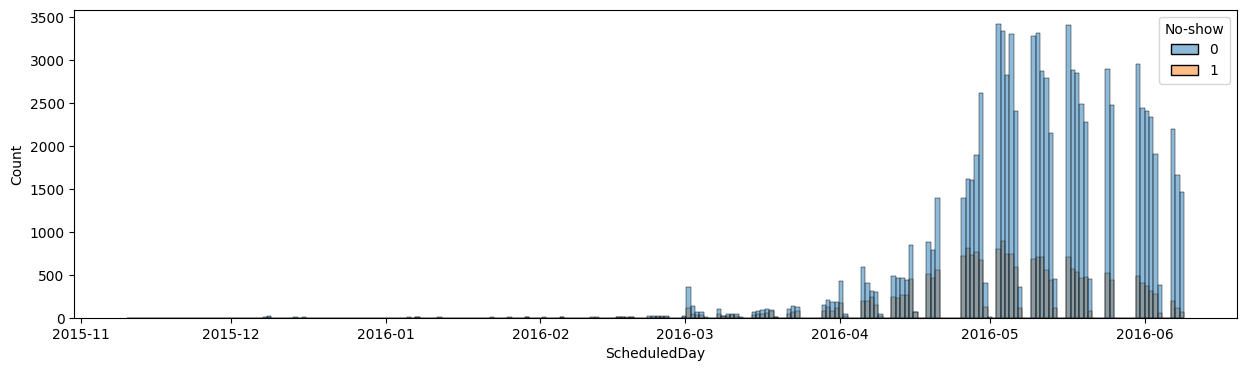

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.histplot(data=df_mod05_medical, x='ScheduledDay', hue='No-show')

plt.show()

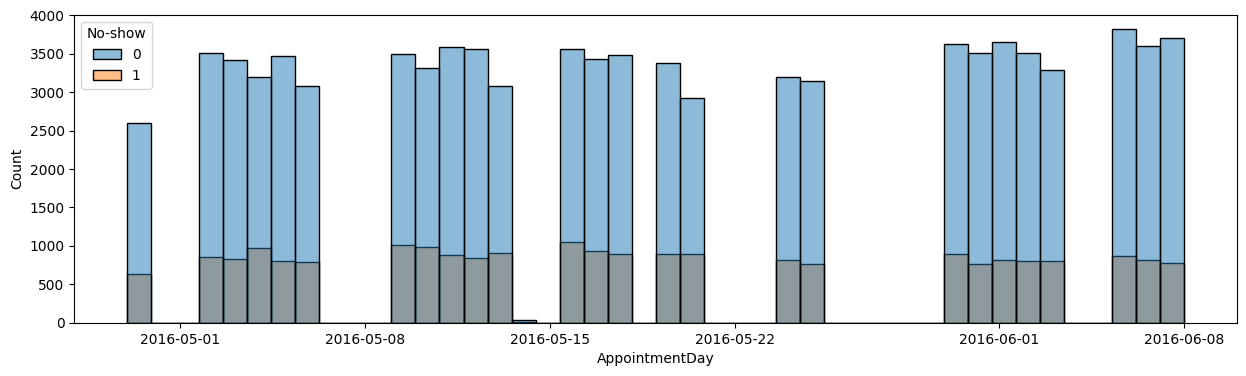

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.histplot(data=df_mod05_medical, x='AppointmentDay', hue='No-show')
# ax.set_ylim(0, 1000)
plt.show()

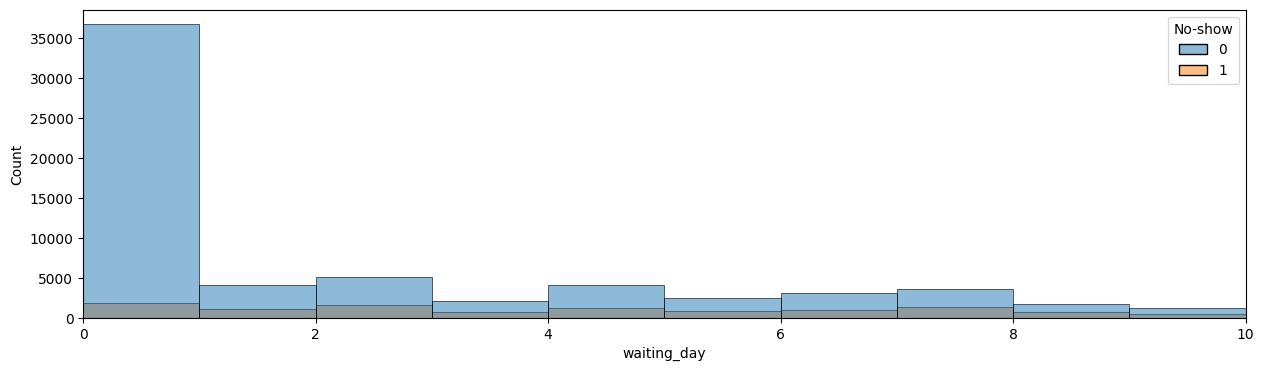

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.histplot(data=df_mod05_medical, x='waiting_day', hue='No-show', bins=179)
ax.set_xlim(0, 10)
# ax.set_ylim(0, 10000)

plt.show()

In [110]:
df_group_result = df_mod05_medical.groupby(['waiting_day'])['No-show'].agg(['sum', 'count']).reset_index()
df_group_result['No_show_ratio'] = df_group_result['sum'] / df_group_result['count']
df_group_result

,waiting_day,sum,count,No_show_ratio
0,0 days,1792,38561,0.046472
1,1 days,1113,5213,0.213505
2,2 days,1602,6725,0.238216
3,3 days,642,2735,0.234735
4,4 days,1231,5290,0.232703
...,...,...,...,...
124,155 days,6,10,0.6
125,162 days,2,11,0.181818
126,169 days,1,8,0.125
127,176 days,6,16,0.375


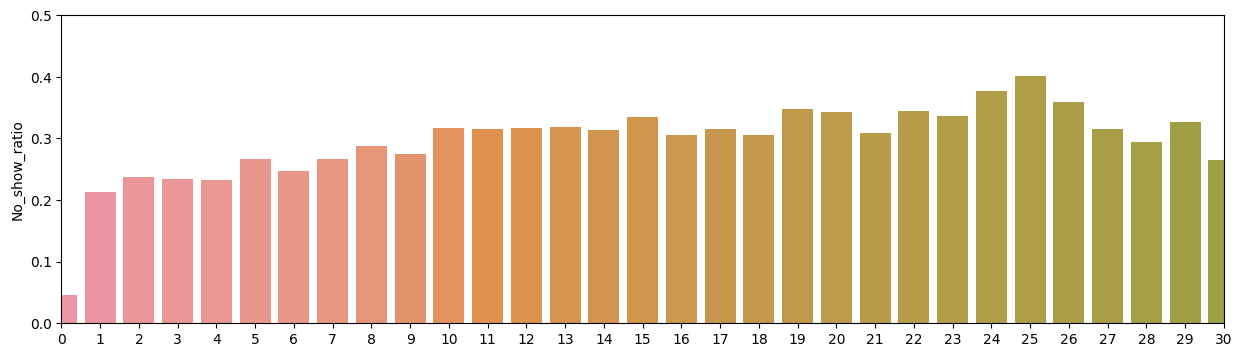

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.barplot(data=df_group_result, x=df_group_result.index, y='No_show_ratio')
ax.set_ylim(0, 0.5)
ax.set_xlim(0, 30)

plt.show()

In [117]:
df_group01_result = df_mod05_medical.groupby(['PatientId'])['No-show'].agg(['sum', 'count']).sort_values(by='count',ascending=False).reset_index()
df_group01_result['No_show_ratio'] = df_group01_result['sum'] / df_group01_result['count']
df_group01_result

,PatientId,sum,count,No_show_ratio
0,8.220000e+14,11,141,0.078014
1,3.350000e+13,6,127,0.047244
2,7.580000e+13,21,124,0.169355
3,8.190000e+13,17,123,0.138211
4,2.690000e+13,8,117,0.068376
...,...,...,...,...
6095,7.692837e+10,0,1,0.0
6096,3.674982e+10,0,1,0.0
6097,3.679254e+10,0,1,0.0
6098,7.682627e+10,0,1,0.0


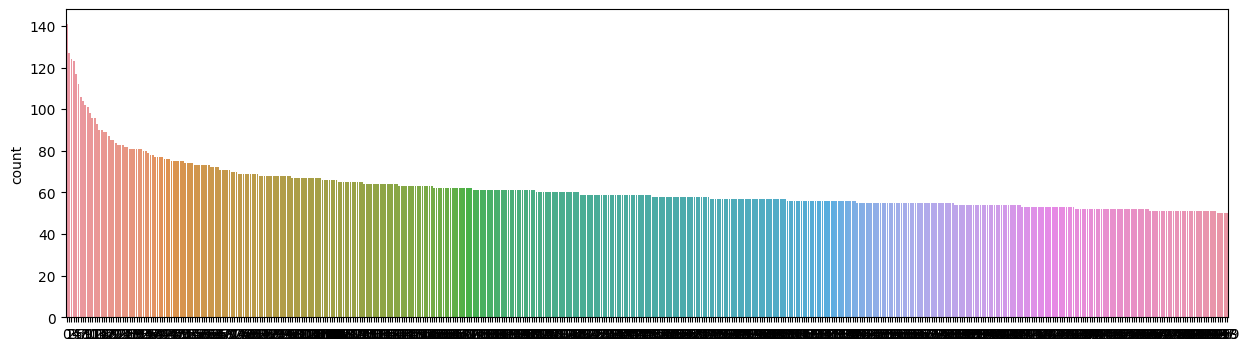

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

df_data_sample = df_group01_result.iloc[0:500,:]

sns.barplot(data=df_data_sample, x=df_data_sample.index, y='count')
# ax.set_xlim(0, 50)

plt.show()

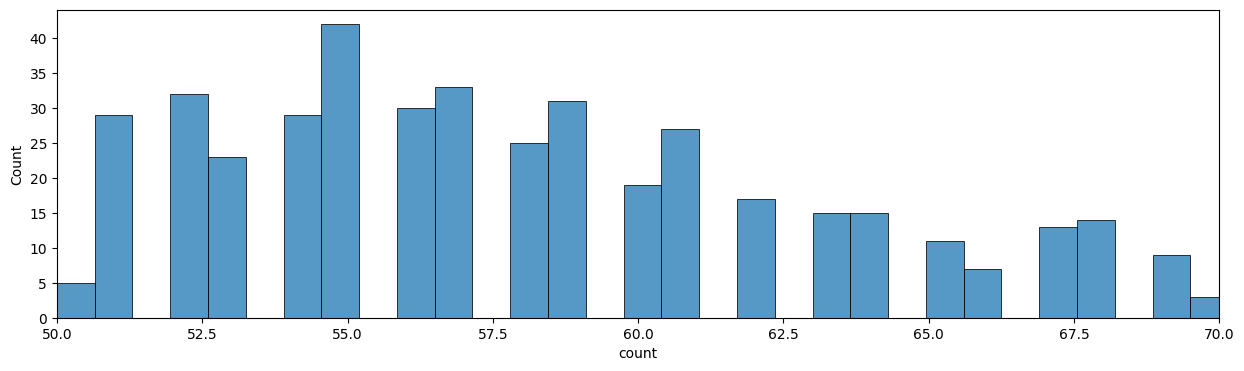

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

df_data_sample = df_group01_result.iloc[0:500,:]

sns.histplot(data=df_data_sample, x='count', bins=140)
ax.set_xlim(50, 70)

plt.show()

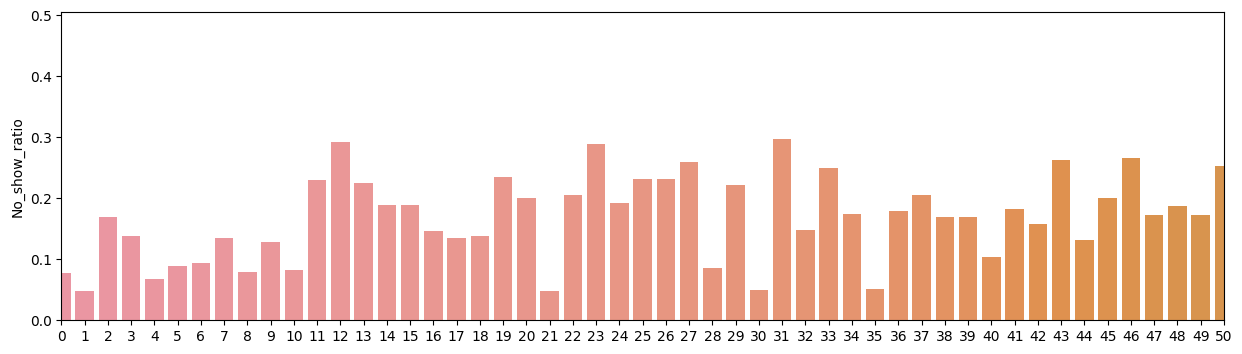

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

df_data_sample = df_group01_result.iloc[0:500,:]

sns.barplot(data=df_data_sample, x=df_data_sample.index, y='No_show_ratio')
ax.set_xlim(0, 50)

plt.show()

In [148]:
df_group02_result = df_mod05_medical.groupby(['PatientId', 'waiting_day'])['No-show'].agg(['sum', 'count']).sort_values(by='waiting_day',ascending=False).reset_index()
df_group02_result['No_show_ratio'] = df_group02_result['sum'] / df_group02_result['count']
df_group02_result

,PatientId,waiting_day,sum,count,No_show_ratio
0,1.220000e+12,179,1,1,1.0
1,3.510000e+14,179,1,1,1.0
2,3.110000e+13,179,0,1,0.0
3,2.550000e+14,179,0,1,0.0
4,3.190000e+13,179,0,1,0.0
...,...,...,...,...,...
51835,7.950000e+11,0,1,2,0.5
51836,3.600000e+12,0,0,4,0.0
51837,8.672423e+10,0,0,1,0.0
51838,8.669647e+10,0,0,2,0.0


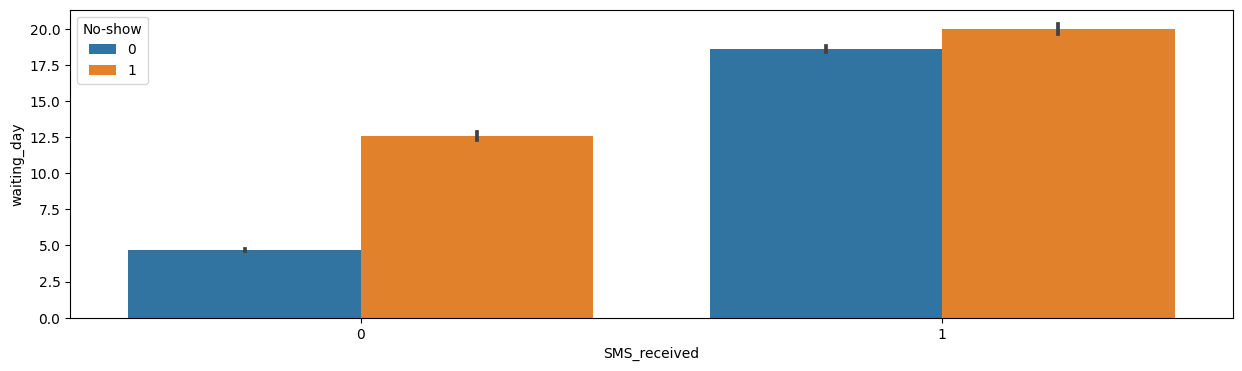

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.barplot(data=df_mod05_medical, x='SMS_received', y='waiting_day', hue='No-show')

plt.show()

In [150]:
df_group03_result = df_mod05_medical.groupby(['SMS_received'])['No-show'].agg(['sum', 'count']).reset_index()
df_group03_result['No_show_ratio'] = df_group03_result['sum'] / df_group03_result['count']
df_group03_result

,SMS_received,sum,count,No_show_ratio
0,0,12527,75035,0.166949
1,1,9784,35481,0.275753


In [153]:
df_mod05_medical['No-show'] = df_mod05_medical['No-show'].astype(int)
df_mod05_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110516 entries, 0 to 110515
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110516 non-null  float64            
 1   AppointmentID   110516 non-null  int64              
 2   Gender          110516 non-null  object             
 3   ScheduledDay    110516 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110516 non-null  datetime64[ns, UTC]
 5   Age             110516 non-null  int64              
 6   Neighbourhood   110516 non-null  object             
 7   SMS_received    110516 non-null  int64              
 8   No-show         110516 non-null  int32              
 9   waiting_day     110516 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int32(1), int64(4), object(2)
memory usage: 8.0+ MB


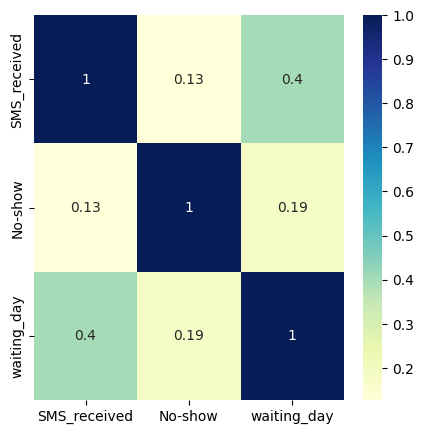

In [156]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

temp_corr = df_mod05_medical.iloc[:,[7,8,9]].corr()
# upp_mat = np.triu(temp_corr)
sns.heatmap(temp_corr, annot=True, cmap='YlGnBu')#, mask=upp_mat)

plt.show()

<AxesSubplot: xlabel='No-show', ylabel='count'>

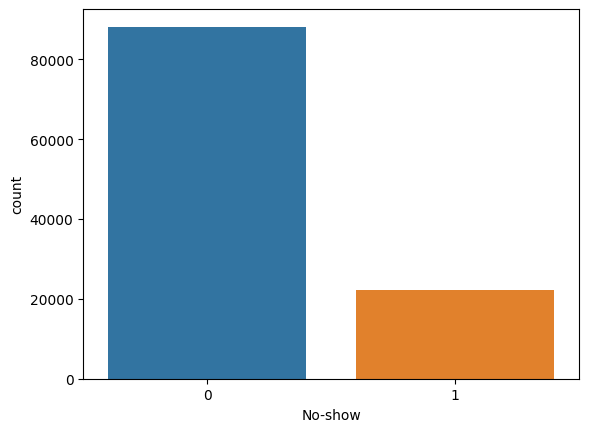

In [157]:
sns.countplot(x='No-show',data=df_mod05_medical)

<AxesSubplot: xlabel='Gender', ylabel='count'>

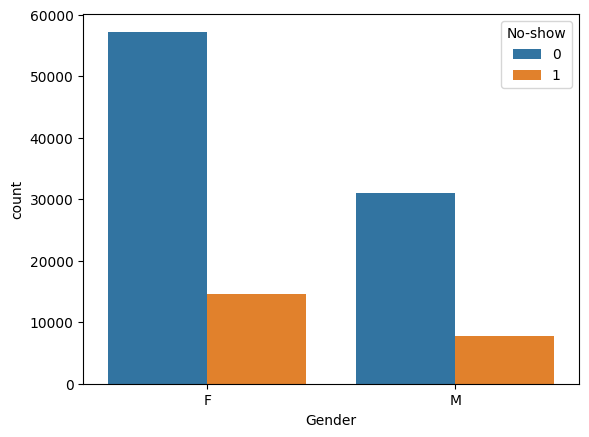

In [158]:
sns.countplot(x='Gender',hue='No-show',data=df_mod05_medical)

In [159]:
df_group04_result = df_mod05_medical.groupby(['Gender'])['No-show'].agg(['sum', 'count']).reset_index()
df_group04_result['No_show_ratio'] = df_group04_result['sum'] / df_group04_result['count']
df_group04_result

,Gender,sum,count,No_show_ratio
0,F,14588,71831,0.203088
1,M,7723,38685,0.199638
